In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [2]:
phish_data = pd.read_csv(r"C:\Users\Ishan\Downloads\phis_url\phishing_site_urls.csv")

In [3]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [5]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [6]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

In [7]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<AxesSubplot:ylabel='Label'>

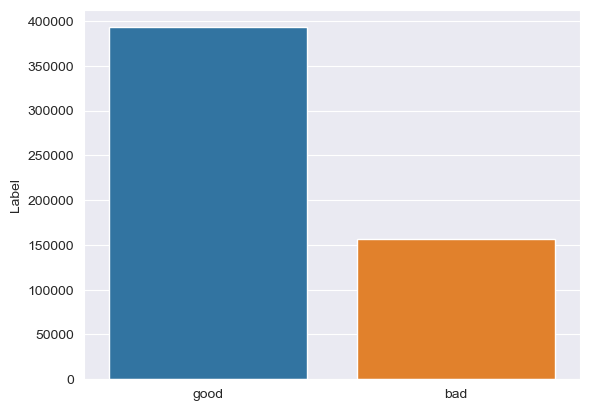

In [8]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

# Preprocessing

### RegexpTokenizer </br><i>A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.</i>

In [9]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [10]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [11]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [12]:
print('Getting words tokenized ...')
t0= time.perf_counter() # start time
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0 # end time
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 3.7064291999999988 sec


In [13]:
phish_data.sample(5) # random 5 rows

,URL,Label,text_tokenized
525194,test777test.ddns.net/,bad,"[test, test, ddns, net]"
523535,johnconsultrade.in/html/30/cp.php?letter=login,bad,"[johnconsultrade, in, html, cp, php, letter, l..."
270525,airnav.com/airport/W58,good,"[airnav, com, airport, W]"
201915,itunes.apple.com/us/app/empire-isis-ar/id40205...,good,"[itunes, apple, com, us, app, empire, isis, ar..."
547942,guess515.fastmail.fm/files/obj/tasks,bad,"[guess, fastmail, fm, files, obj, tasks]"


### SnowballStemmer </br><i>Snowball is a small string processing language, gives root words
</i>

In [14]:
stemmer = SnowballStemmer("english") # choose a language

In [15]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 76.78150120000001 sec


In [16]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
502066,sardexcel.com/9nh3kp,bad,"[sardexcel, com, nh, kp]","[sardexcel, com, nh, kp]"
104396,warrenhendricks.co.za/wp-includes/js/crop/gd/H...,bad,"[warrenhendricks, co, za, wp, includes, js, cr...","[warrenhendrick, co, za, wp, includ, js, crop,..."
327584,facebook.com/jeffrey.berkley,good,"[facebook, com, jeffrey, berkley]","[facebook, com, jeffrey, berkley]"
171866,en.wikipedia.org/wiki/Bobb%27e_J._Thompson,good,"[en, wikipedia, org, wiki, Bobb, e, J, Thompson]","[en, wikipedia, org, wiki, bobb, e, j, thompson]"
361978,infobarrel.com/1980_NHL_Entry_Draft_-_4_From_B...,good,"[infobarrel, com, NHL, Entry, Draft, From, Bey...","[infobarrel, com, nhl, entri, draft, from, bey..."


In [17]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.42381109999999467 sec


In [18]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
450293,trainboard.com/grapevine/archive/index.php/f-1...,good,"[trainboard, com, grapevine, archive, index, p...","[trainboard, com, grapevin, archiv, index, php...",trainboard com grapevin archiv index php f html
354795,hotfrog.com/Products/Catholic-Church/FL/Jackso...,good,"[hotfrog, com, Products, Catholic, Church, FL,...","[hotfrog, com, product, cathol, church, fl, ja...",hotfrog com product cathol church fl jacksonvill
90506,www.adrian.elwin.btinternet.co.uk/EACU/Eacu.html,good,"[www, adrian, elwin, btinternet, co, uk, EACU,...","[www, adrian, elwin, btinternet, co, uk, eacu,...",www adrian elwin btinternet co uk eacu eacu html
439311,stlouisrams.com/,good,"[stlouisrams, com]","[stlouisram, com]",stlouisram com
429321,semrush.com/sem.html,good,"[semrush, com, sem, html]","[semrush, com, sem, html]",semrush com sem html


# Visualization

In [19]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [20]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [21]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


### <i>Create a function to visualize the important keys from url
</i>

In [32]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout() 

In [33]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

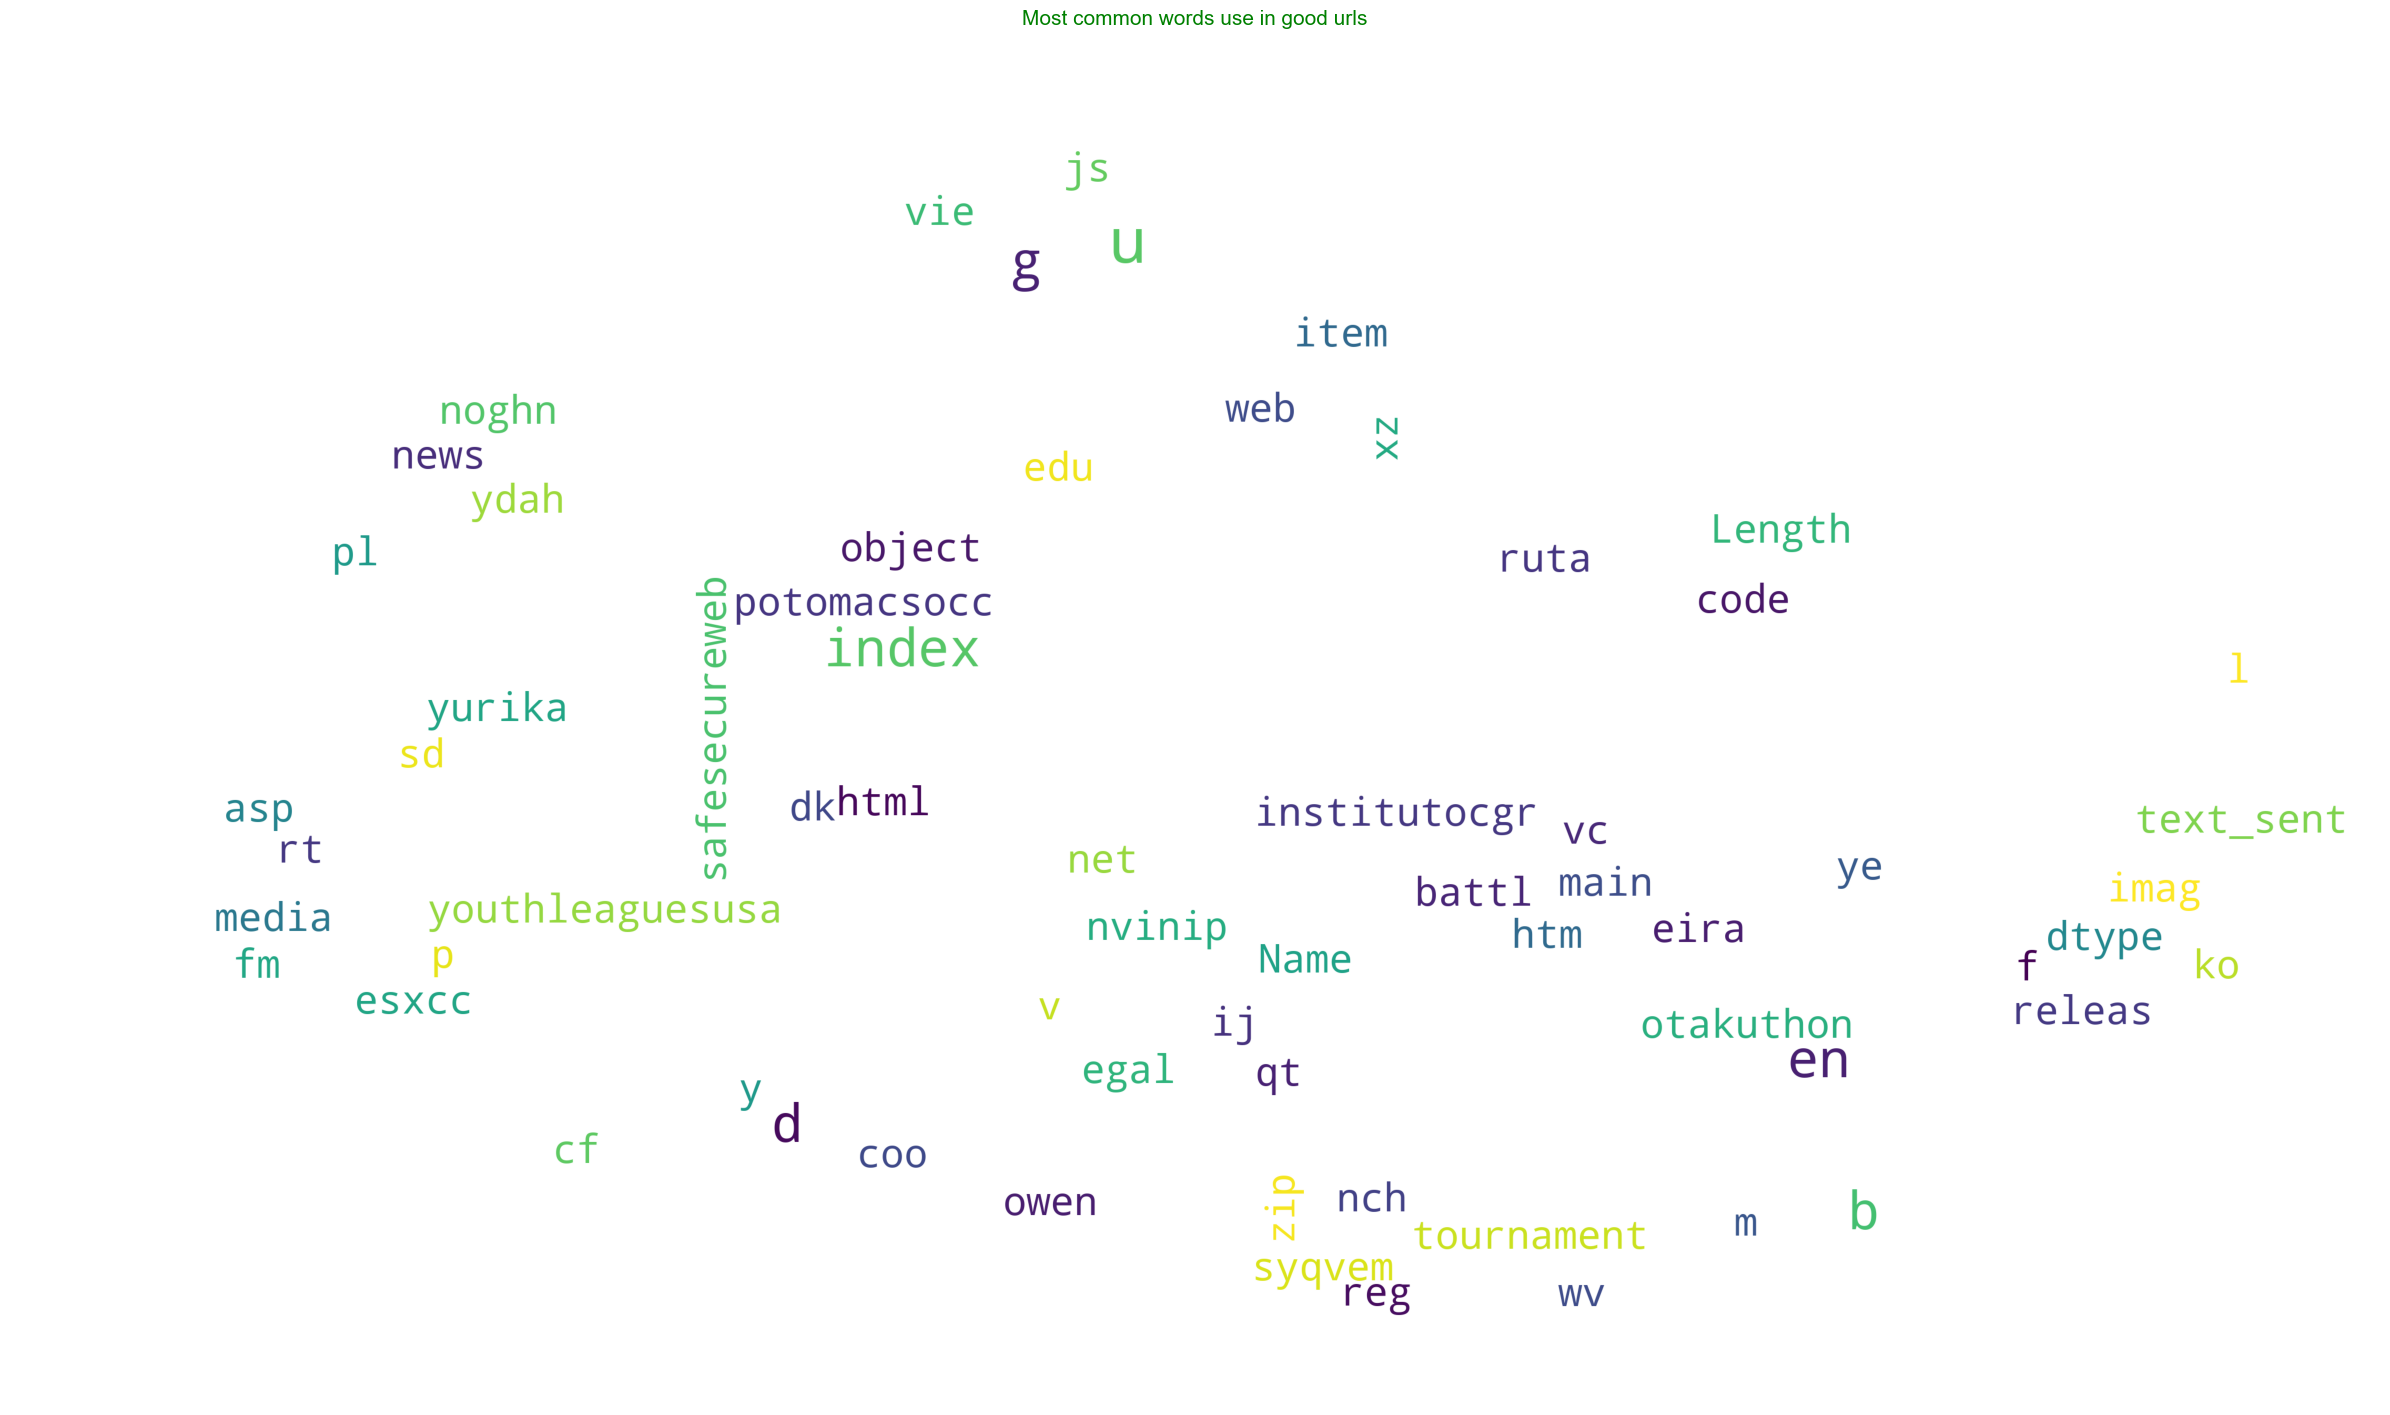

In [34]:
common_text = str(data)
common_mask = np.array(Image.open(r"C:\Users\Ishan\Downloads\vecteezy_white-cloud-clipart-design-illustration_9302650_805.png"))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [35]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

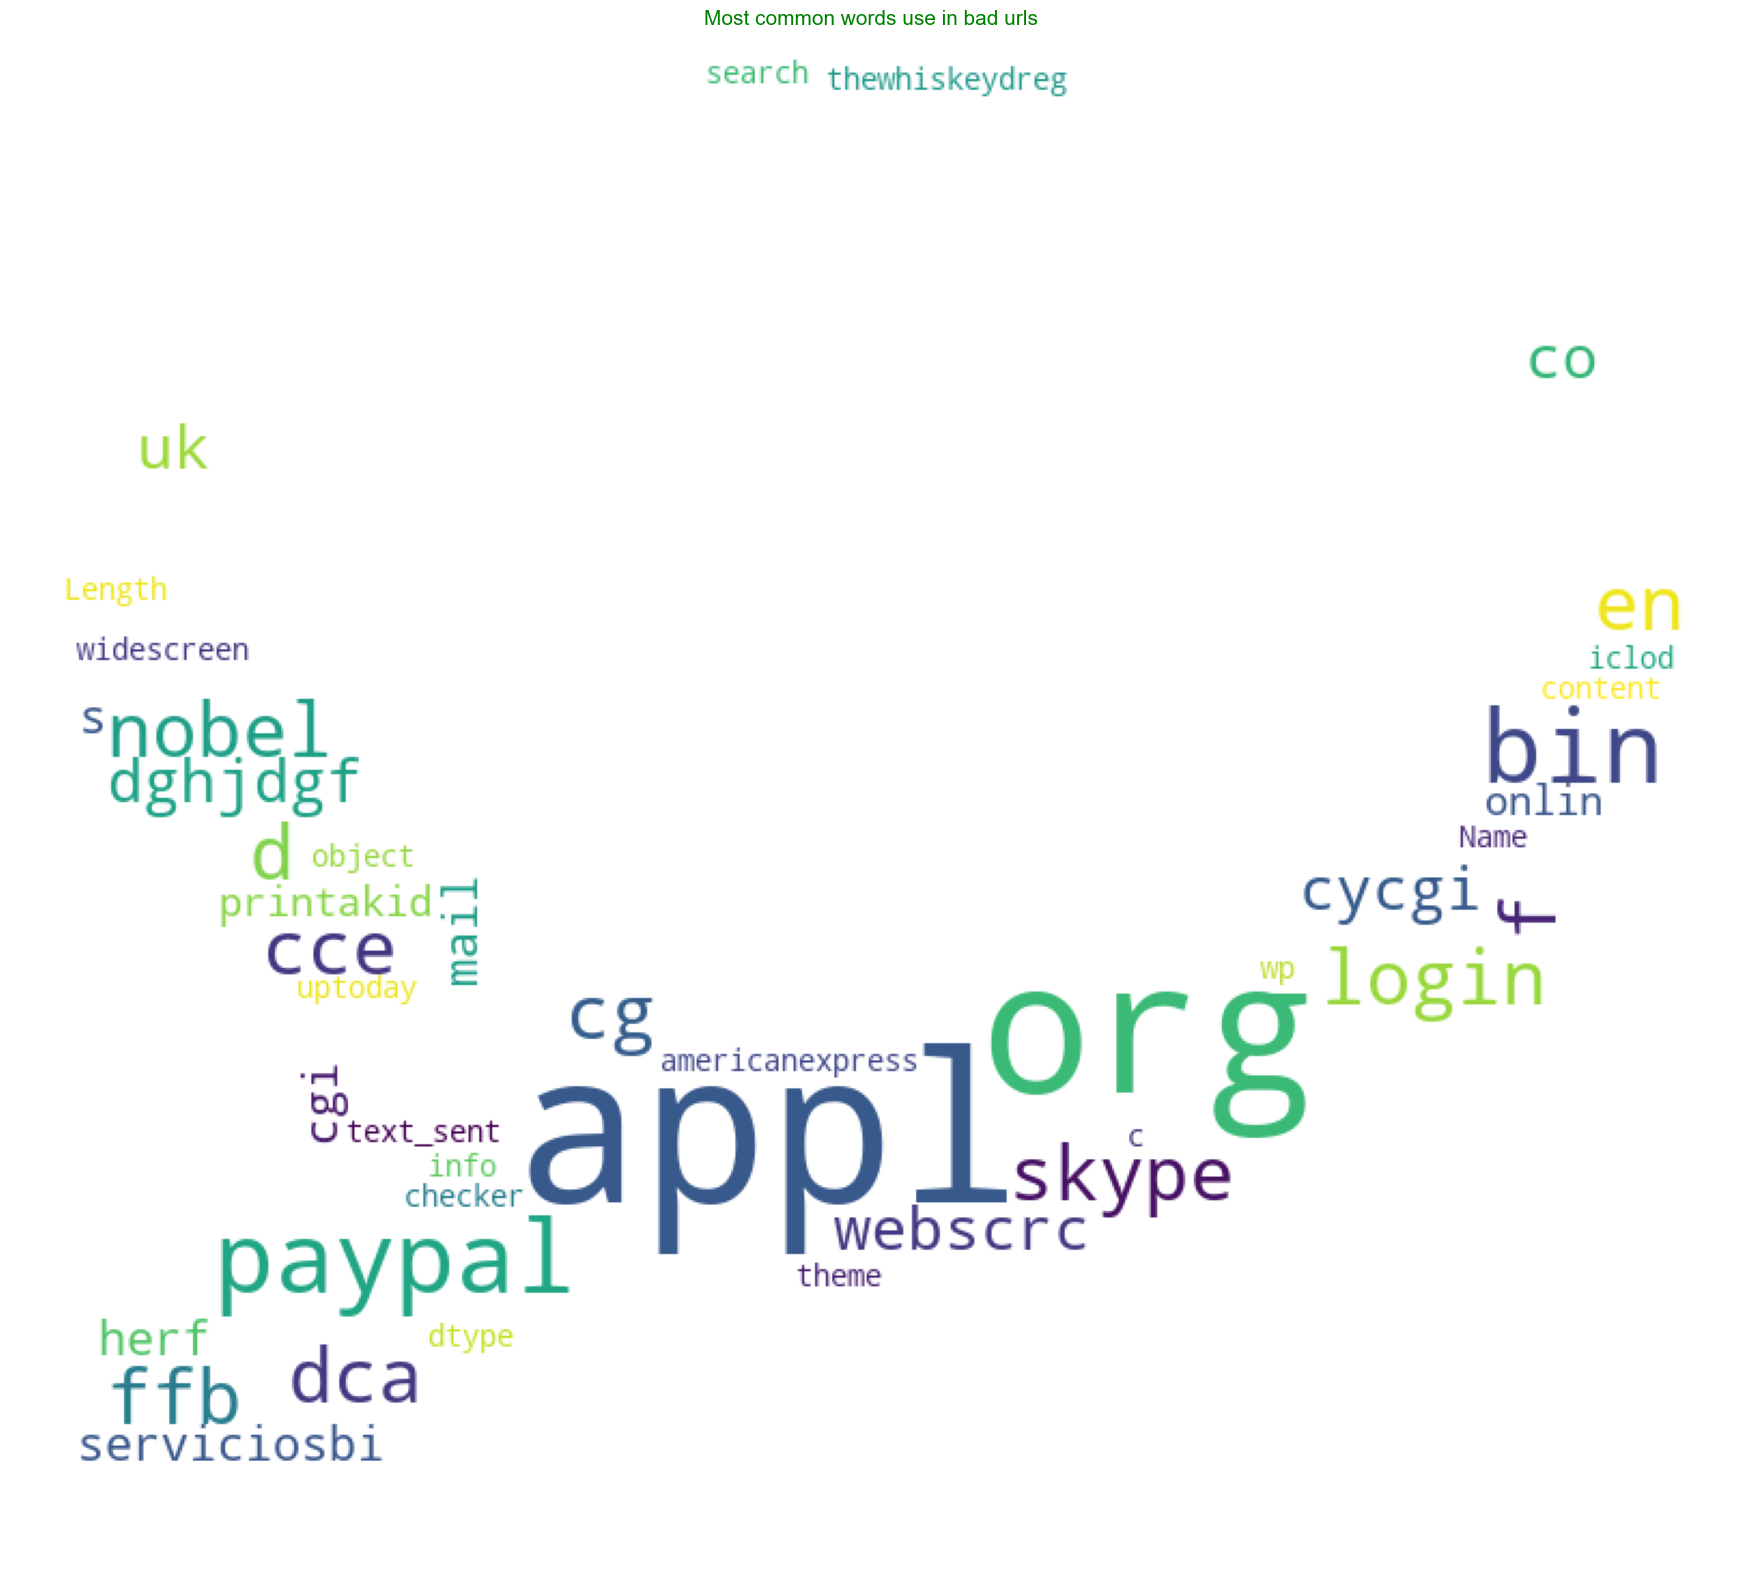

In [36]:
common_text = str(data)
common_mask = np.array(Image.open(r"C:\Users\Ishan\Downloads\comment_cloud.png"))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

### <i>Visualize internal links, it will shows all redirect links.</i>

In [57]:
browser = webdriver.Chrome()

In [58]:
list_urls = ['https://www.ezeephones.com/','https://www.ezeephones.com/about-us'] #here i take phishing sites 
links_with_text = []

### <i>BeautifulSoup</i>

In [59]:
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

In [60]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [61]:
df.head()

,from,to
0,https://www.ezeephones.com/,https://sedo.com/search/details/?partnerid=144...
1,https://www.ezeephones.com/,https://sedo.com/search/details/?partnerid=144...
2,https://www.ezeephones.com/,https://www.sedo.com/services/parking.php3
3,https://www.ezeephones.com/,#
4,https://www.ezeephones.com/about-us,https://sedo.com/search/details/?partnerid=144...


### <i>Draw a graph of the internal links of a web page.</i>

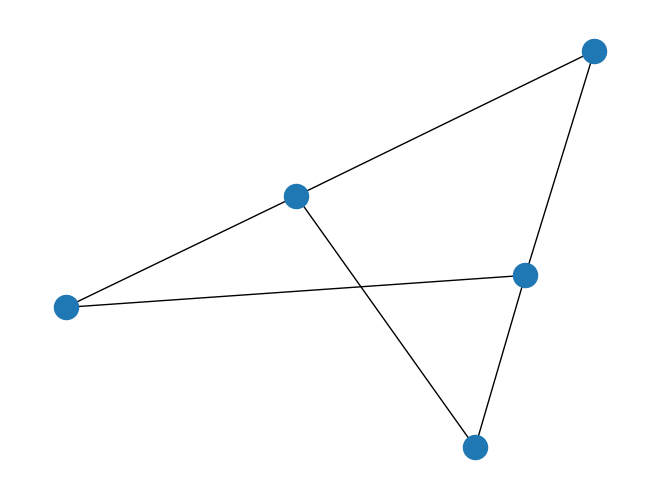

In [62]:
GA = nx.from_pandas_edgelist(df, source="from", target="to")
nx.draw(GA, with_labels=False)

# Creating Model

### CountVectorizer</br>
<i>CountVectorizer is used to transform a corpora of text to a vector of term / token counts.</i>


In [63]:
#create cv object
cv = CountVectorizer()

In [64]:
#help(CountVectorizer())

In [65]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [66]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### <i>Splitting the data into train and test</i>

In [67]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

# Logistic Regression

<i>Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.</i>

In [68]:
# create lr object
lr = LogisticRegression()

In [69]:
lr.fit(trainX,trainY)

LogisticRegression()

In [70]:
lr.score(testX,testY)

0.9631053539832675

In [71]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9772068085891328
Testing Accuracy : 0.9631053539832675

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36630
        Good       0.99      0.96      0.97    100707

    accuracy                           0.96    137337
   macro avg       0.94      0.96      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot:>

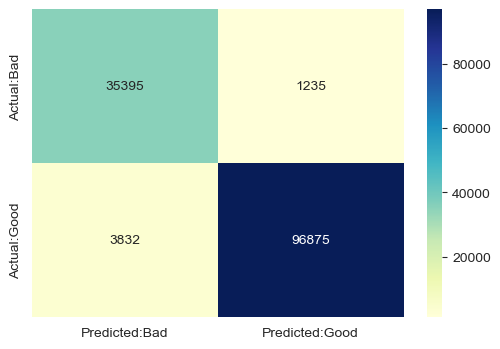

In [72]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

# MultinomialNB

<i>Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.
</i>

In [73]:
# create mnb object
mnb = MultinomialNB()

In [74]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [75]:
mnb.score(testX,testY)

0.9578409314314423

In [76]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9738330958789735
Testing Accuracy : 0.9578409314314423

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.94      0.93     38425
        Good       0.97      0.97      0.97     98912

    accuracy                           0.96    137337
   macro avg       0.95      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot:>

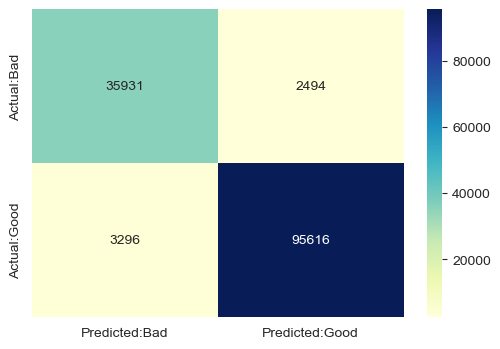

In [77]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<AxesSubplot:ylabel='Accuracy'>

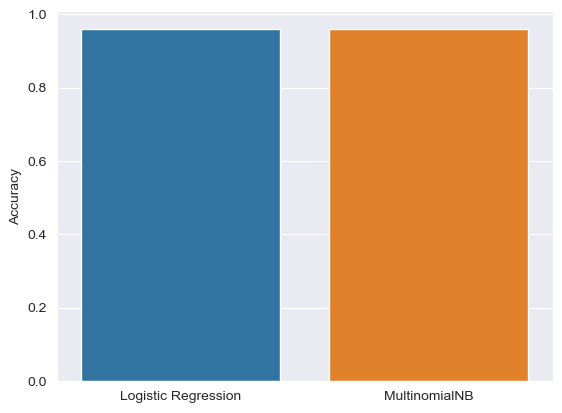

In [78]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression



In [79]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [80]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [81]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [82]:
pipeline_ls.score(testX,testY) 

0.96677515891566

Training Accuracy : 0.9809785708564619
Testing Accuracy : 0.96677515891566

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36836
        Good       0.99      0.97      0.98    100501

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<AxesSubplot:>

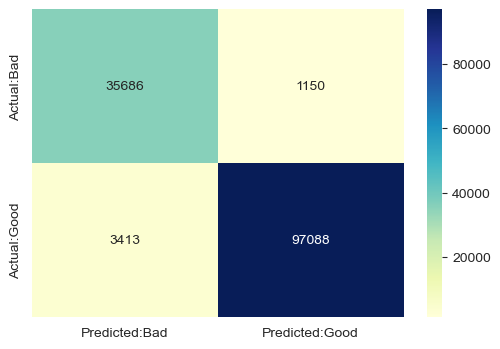

In [83]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [84]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [85]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.96677515891566


* <i>Bad links => this are phishing sites
yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
fazan-pacir.rs/temp/libraries/ipad
www.tubemoviez.exe
svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

* Good links => this are not phishing sites
www.youtube.com/
youtube.com/watch?v=qI0TQJI3vdU
www.retailhellunderground.com/
restorevisioncenters.com/html/technology.html</i>

In [88]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
